 **ATIVIDADE DE ESTATÍSTICA E PROBABILIDADE

DATA SCIENCE

GEOVANA SILVA NOGUEIRA

22/05/2025**

***PARTE 1 - IMPORTAR DADOS***

In [1]:
from google.colab import files
uploaded = files.upload()

Saving base_clientes_loja_esportiva.csv to base_clientes_loja_esportiva.csv


In [3]:
import pandas as pd

df = pd.read_csv('base_clientes_loja_esportiva.csv')
df.head()

,ID,Idade,ValorCompra,CategoriaProduto,ComprasMes,Fidelidade
0,1,56,409.63,Garrafa,1,Sim
1,2,46,525.60,Tênis,10,Sim
2,3,32,263.75,Tênis,9,Sim
3,4,60,316.58,Garrafa,1,Sim
4,5,25,150.86,Tênis,9,Sim


A loja online deseja entender o perfil de seus clientes e identificar padrões de compra que ajudem na tomada de decisões estratégicas. Uma amostra de 100 clientes foi coletada com os seguintes dados:

- ID do cliente
- Idade
- Valor da compra
- Categoria do produto
- Compras no mês
- Participação no programa de fidelidade

Dadas as variáveis da base de dados, classifca-se cada uma em qualitativa ou quantitativa a partir do seu tipo:

- ID: Quantitativa
- Idade: Quantitativa
- ValorCompra: Quantitativa
- CategoriaProduto: Qualitativa
- ComprasMes: Quantitativa
- Fidelidade: Qualitativa

Analisando as variáveis presentes, chega-se à conclusão de que a variável que melhor representa o comportamento de consumo do cliente é a ComprasMes.
Essa variável mostra a quantidade de vezes que o cliente realiza uma compra na loja, ou seja, a frequência de compras.

***PARTE 2 - ESTATÍSTICA DESCRITIVA***

Baseando na coluna Valor da Compra presente na base de dados, calcula-se a média, mediana, moda, variância e desvio padrão desses dados.

In [4]:
# Cálculo da Média - Uso da função .mean() que soma todos os valores e divide pela qdd total
media = df["ValorCompra"].mean()

# Cálculo da Mediana - Uso da função .median() que encontra o valor central
mediana = df["ValorCompra"].median()

# Cálculo da Moda - Uso da função .mode() que encontra o valor que aparece mais vezes
moda = df["ValorCompra"].mode()[0]

# Cálculo da Variância - Uso da função .var() que mede a dispersão dos dados em relação à média
variancia = df["ValorCompra"].var()

# Cálculo do Desvio Padrão - Uso da função .std() que tira a raíz quadrada da variância
desviop = df["ValorCompra"].std()

# Imprimindo os resultados na tela
print("Média:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Variância:", variancia)
print("Desvio Padrão:", desviop)

Média: 353.29510000000005
Mediana: 364.005
Moda: 50.0
Variância: 27184.19237675757
Desvio Padrão: 164.87629416249496


A partir da análise do resultado dos cálculos acima, conclui-se que os dados apresentam grande dispersão, pois tem-se valores muito baixo em relação a um alto desvio padrão. Isso indica que o padrão de compra dos clientes é bem variável, com clientes realizando compras de valores bem baixos e outros com valores altos.

**Tabela de frequência de compras realizadas no mês**

Funções utilizadas:
- value_counts(): Quantidade de vezes que cada valor aparece
- sort_index(): Ordena os valores a partir da quantidade de compras
- reset_index(): Transforma o resultado em um DataFrame

In [5]:
# Criação da tabela de frequência
frequencia_compras = df['ComprasMes'].value_counts().sort_index().reset_index()
frequencia_compras.columns = ['Compras no Mês', 'Frequência']

# Imprimindo a tabela de frequência
print(frequencia_compras)

    Compras no Mês  Frequência
0                0          10
1                1           7
2                2           8
3                3           7
4                4          12
5                5          10
6                6          11
7                7           7
8                8           7
9                9          18
10              10           3


**Cálculo da média da Idade dos clientes que participam do programa de fidelidade da loja**

In [6]:
# Uso do df para filtrar apenas os clientes que participam do programa de fidelidade
fidelizados = df[df['Fidelidade'] == 'Sim']

# Cálculo da média da idade
media_idade_fidelizados = fidelizados['Idade'].mean()

# Imprime o resultado
print("Média da idade dos clientes fidelizados:", round(media_idade_fidelizados, 2))


Média da idade dos clientes fidelizados: 37.92


**O código abaixo calcula a probabilidade de um cliente ter mais de 35 anos de idade e não participar do programa de fidelidade da loja**

In [8]:
# Padroniza os dados da coluna Fidelidade
df['Fidelidade'] = df['Fidelidade'].str.strip().str.lower()

# Uso do df para filtrar os clientes não fidelizados
nao_fidelizados = df[df['Fidelidade'] == 'nao']

# Verifica se existem clientes não fidelizados
if len(nao_fidelizados) == 0:
    print("Nenhum cliente não fidelizado encontrado na base. Não é possível calcular a probabilidade.")
else:
    # Qdd de clientes não fidelizados
    total_nao_fidelizados = len(nao_fidelizados)

    # Qdd de clientes não fidelizados com idade acima de 35
    maiores_35_nao_fidelizados = nao_fidelizados[nao_fidelizados['Idade'] > 35]

    # Cálculo da probabilidade
    probabilidade = len(maiores_35_nao_fidelizados) / total_nao_fidelizados

    # Imprime o resultado
    print("Probabilidade de um cliente ter mais de 35 anos, dado que não participa do programa de fidelidade : ", probabilidade)


Nenhum cliente não fidelizado encontrado na base. Não é possível calcular a probabilidade.


**Cálculo da probabilidade conjunta de um cliente ter feito 5 compras ou mais no mês e ter comprado um produto da categoria Tênis**

In [10]:
# Padronizar a coluna de categoria
df['CategoriaProduto'] = df['CategoriaProduto'].str.strip().str.lower()

# Filtrar os clientes que compraram mais de 5 produtos e que compraram tênis
condicao = (df['ComprasMes'] >= 5) & (df['CategoriaProduto'] == 'tênis')

# Qdd de clientes que satisfazem as condições
num_satisfazem_ambos = df[condicao].shape[0]

# Total de clientes
total_clientes = df.shape[0]

# Cálculo da probabilidade conjunta
prob_conjunta = num_satisfazem_ambos / total_clientes

# Imprime o resultado
print(f"Probabilidade de um cliente ter feito 5 ou mais compras no mês e comprado um produto da categoria 'Tênis':", prob_conjunta)


Probabilidade de um cliente ter feito 5 ou mais compras no mês e comprado um produto da categoria 'Tênis': 0.18


**Cálculo da proporção de clientes com menos de 30 anos**

In [11]:
# Uso do df para filtrar clientes com idade menor de 30 anos
clientes_menor_30 = df[df['Idade'] < 30]

# QDD de clientes abaixo de 30 anos
num_menor_30 = len(clientes_menor_30)

# Total de clientes
total_clientes = len(df)

# Cálculo da proporção
proporcao = num_menor_30 / total_clientes

# Imprime resultado
print("Proporção de clientes com menos de 30 anos: ", proporcao)


Proporção de clientes com menos de 30 anos:  0.29


***PARTE 4 - ANÁLISE CRÍTICA E ESTRATÉGIA***

**Categoria de produto mais promissora a uma ação promocional: **

In [13]:
# Uso do df para filtrar os nomes das categorias
df['CategoriaProduto'] = df['CategoriaProduto'].str.strip().str.lower()

# Agrupar por categoria e calcular o que foi pedido
analise_categoria = df.groupby('CategoriaProduto').agg({
    'ID': 'count',
    'ValorCompra': 'mean',
    'ComprasMes': 'sum'
}).rename(columns={
    'ID': 'QtdClientes',
    'ValorCompra': 'ValorMedioCompra',
    'ComprasMes': 'TotalComprasMes'
}).sort_values(by='QtdClientes', ascending=False)

# Imprime a análise
print(analise_categoria)


                  QtdClientes  ValorMedioCompra  TotalComprasMes
CategoriaProduto                                                
garrafa                    31        362.015161              155
tênis                      27        319.530741              150
mochila                    21        376.237143               81
roupa                      21        360.891905              119


A categoria que possui mais clientes e maior compra mensal é a garrafa, indicando que possui alta demanda na loja.

O maior valor médio de compra indica qual produto gera mais lucro para a empresa.

A partir disso, conclui-se que a Garrafa é o produto mais promissor a uma açõa promocional, visto que possui maior quantidade de clientes e maior número de vendas mensalmente, além de um bom valor médio de compra.

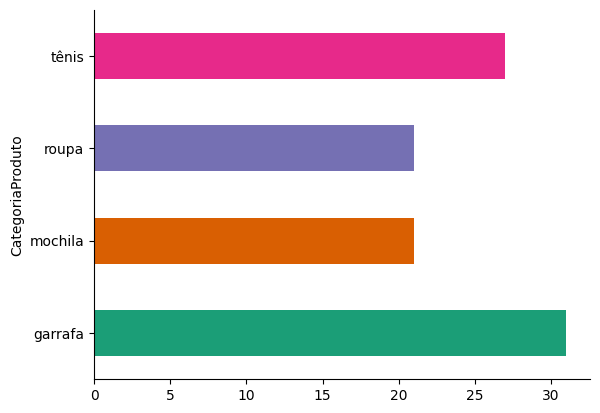

In [19]:
# @title CategoriaProduto

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('CategoriaProduto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Comparação entre os valores médios de compra entre os clientes fidelizados e não fidelizados**

In [15]:
# Uso do df para padronizar os valores da coluna Fidelidade
df['Fidelidade'] = df['Fidelidade'].str.strip().str.lower()

# Cálculo do valor médio de compra para cada grupo
gastoMedio = df.groupby('Fidelidade')['ValorCompra'].mean()

# Imprime os resultados
print("Valor médio de compra por grupo de fidelidade:")
print(gastoMedio)


Valor médio de compra por grupo de fidelidade:
Fidelidade
não    376.756389
sim    340.098125
Name: ValorCompra, dtype: float64


O resultado mostra que o valor médio de compra dos clientes não fidelizados é de aproximadamente R$377,00, enquanto a média dos clientes fidelizados é de R$340,00. Portanto, os clientes que não fazem parte do programa de fidelidade da loja gastam mais do que os que estão inseridos, indicando que o programa pode não ser a melhor estratégia de vendas.

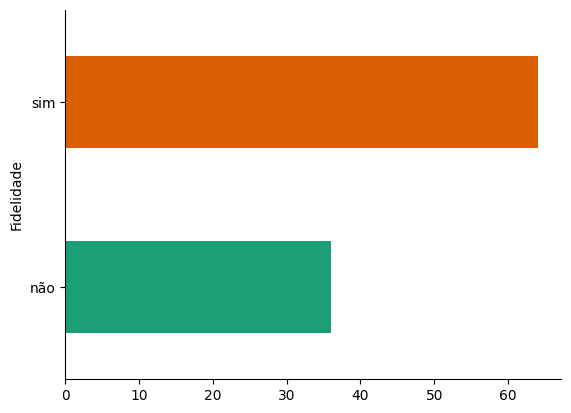

In [20]:
# @title Fidelidade

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Fidelidade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Limitações de trabalhar com amostra de dados com 100 registros.**

Quando trabalhamos com uma base de dados com apenas 100 amostras, ela pode ser bastante limitada, principalmente quando comparamos com a quantidade real de clientes que a loja atende. Se a loja possui alto volume de clientes cadastrados, a amostra de dados a ser usada para cálculos de provisões e indicações comportameis acerca deles deve acompanhar e ser proporcional ao total de clientes.

Além disso, é importante que seja selecionada a amostra de forma não aleatória, para que os resultados obtidos através dela sejam condizentes com todos os clientes, e não somente com uma parte. Assim, garantimos resultados reais e significativos acerca da loja, que realmente condizem com seu dia a dia.

Outro ponto acerca da limitação de uma amostra de apenas 100 clientes é referente às modificações que os dados possam sofrer. Pequenas modificações em bases de dados pequenos já geram alterações significativas no resultado final.